In [53]:

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import StandardScaler

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


# 데이터 전처리

In [13]:
df = pd.read_csv('이상치제거.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,실명(좌),실명(우)
0,1,1,30,43,170,75,90.0,1.0,1.0,1.0,...,1.0,1.0,21.0,35.0,40.0,1.0,0,0,0,0
1,2,1,30,11,180,80,89.0,0.9,1.2,1.0,...,1.0,0.9,20.0,36.0,27.0,3.0,1,0,0,0
2,4,1,50,48,175,80,91.0,1.5,1.2,1.0,...,1.0,1.1,29.0,34.0,18.0,1.0,1,0,0,0
3,5,1,50,30,165,60,80.0,1.0,1.2,1.0,...,1.0,0.8,19.0,12.0,25.0,1.0,1,0,0,0
4,6,1,50,41,165,55,75.0,1.2,1.5,1.0,...,3.0,0.8,29.0,40.0,37.0,3.0,0,0,0,0


In [14]:

Scalar_Index =['신장(5Cm단위)', '체중(5Kg단위)',
       '허리둘레', '시력(좌)', '시력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피']

scaler = StandardScaler()
scaler.fit(df[Scalar_Index])
df[Scalar_Index] = scaler.transform(df[Scalar_Index])

In [15]:
data = df
data

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,실명(좌),실명(우)
0,1,1,30,43,0.895224,1.125270,1.099567,0.139495,0.037768,1.0,...,1.0,0.829057,-0.282688,1.490189,1.002864,1.0,0,0,0,0
1,2,1,30,11,1.976477,1.551729,0.990656,-0.150534,0.378075,1.0,...,1.0,0.314562,-0.442593,1.594638,0.123610,3.0,1,0,0,0
2,4,1,50,48,1.435850,1.551729,1.208477,1.589645,0.378075,1.0,...,1.0,1.343553,0.996553,1.385739,-0.485105,1.0,1,0,0,0
3,5,1,50,30,0.354597,-0.154106,0.010463,0.139495,0.378075,1.0,...,1.0,-0.199934,-0.602498,-0.912151,-0.011660,1.0,1,0,0,0
4,6,1,50,41,0.354597,-0.580565,-0.534089,0.719555,0.888536,1.0,...,3.0,-0.199934,0.996553,2.012436,0.799959,3.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794472,999996,1,40,48,1.435850,1.551729,1.328278,1.589645,0.888536,1.0,...,1.0,0.829057,0.516838,1.594638,0.123610,1.0,1,1,0,0
794473,999997,1,30,41,0.895224,1.125270,0.663925,0.139495,0.888536,1.0,...,1.0,1.343553,-1.402024,-0.389903,-0.688010,1.0,1,1,0,0
794474,999998,2,40,26,-0.726656,-1.007024,-1.296461,0.139495,-0.472693,1.0,...,1.0,-0.199934,1.156458,0.654592,-0.552740,3.0,0,1,0,0
794475,999999,1,20,29,1.435850,-0.154106,-0.860820,1.589645,0.037768,1.0,...,1.0,-0.199934,-0.282688,-0.703251,-0.552740,1.0,1,1,0,0


In [ ]:
# 명목형 변수 설정
data[['성별코드','연령대코드(5세단위)','청력(좌)','청력(우)','요단백','실명(좌)','실명(우)','음주여부','흡연상태','구강검진수검여부']] \
    = data[['성별코드','연령대코드(5세단위)','청력(좌)','청력(우)','요단백','실명(좌)','실명(우)','음주여부','흡연상태','구강검진수검여부']].astype('category')


# Train/Test 셋 생성

In [58]:

train_data = data[data['가입자일련번호']%5 != 0]
test_data = data[data['가입자일련번호']%5 == 0]

# Traindataa

X_train =  train_data[[ '신장(5Cm단위)', '체중(5Kg단위)',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부',
       '구강검진수검여부', '실명(좌)', '실명(우)']]

y_train = train_data[['성별코드']]

#test_data
X_test =  test_data[[ '신장(5Cm단위)', '체중(5Kg단위)',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부',
       '구강검진수검여부', '실명(좌)', '실명(우)']]

y_test = test_data[['성별코드']]


y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159023 entries, 3 to 794476
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   성별코드    159023 non-null  category
dtypes: category(1)
memory usage: 1.4 MB


# 중요 Featrue 도출

Feature ranking:
1. feature 신장(5Cm단위) (0.267)
2. feature 혈색소 (0.203)
3. feature 흡연상태 (0.150)
4. feature 혈청크레아티닌 (0.119)
5. feature 체중(5Kg단위) (0.050)
6. feature 감마지티피 (0.041)
7. feature 허리둘레 (0.030)
8. feature HDL콜레스테롤 (0.019)
9. feature 음주여부 (0.016)
10. feature (혈청지오티)ALT (0.014)
11. feature 총콜레스테롤 (0.012)
12. feature 수축기혈압 (0.011)
13. feature 트리글리세라이드 (0.011)
14. feature (혈청지오티)AST (0.010)
15. feature LDL콜레스테롤 (0.010)
16. feature 식전혈당(공복혈당) (0.010)
17. feature 이완기혈압 (0.008)
18. feature 시력(우) (0.007)
19. feature 시력(좌) (0.007)
20. feature 구강검진수검여부 (0.002)
21. feature 청력(좌) (0.001)
22. feature 요단백 (0.001)
23. feature 청력(우) (0.001)
24. feature 실명(우) (0.000)
25. feature 실명(좌) (0.000)


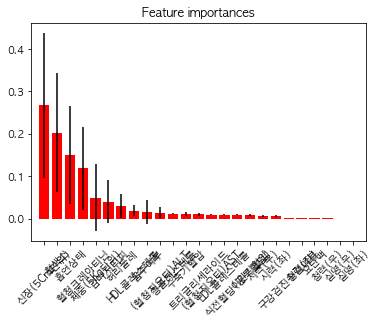

In [59]:
model_feature = RandomForestClassifier()
model_feature.fit(X = X_train, y = y_train)
import matplotlib.pyplot as plt

importances = model_feature.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_feature.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, X_train.columns[indices][f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Data set 수정

In [39]:

train_data = data[data['가입자일련번호']%5 != 0]
test_data = data[data['가입자일련번호']%5 == 0]

# Traindataa

X_train =  train_data[[ '신장(5Cm단위)', '체중(5Kg단위)',
       '허리둘레', '혈색소', '혈청크레아티닌', '감마지티피', '흡연상태']]

y_train = train_data[['성별코드']]

#test_data
X_test =  test_data[[ '신장(5Cm단위)', '체중(5Kg단위)',
       '허리둘레', '혈색소', '혈청크레아티닌' ,'감마지티피', '흡연상태']]

y_test = test_data[['성별코드']]

# 파라미터 튜닝

In [42]:
def RF_objective(trial):

    max_depth = trial.suggest_int('max_depth', 1, 100)
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 2, 1000)
    n_estimators =  trial.suggest_int('n_estimators', 50, 200)
    max_features =  trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    min_samples_leaf =  trial.suggest_int('min_samples_leaf', 1, 10)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    model = RandomForestClassifier(
            max_depth = max_depth,
            max_leaf_nodes = max_leaf_nodes,
            n_estimators = n_estimators,
            n_jobs=-1,
            min_samples_leaf = min_samples_leaf,
            max_features = max_features,
            criterion = criterion,
            random_state=42)


    model.fit(X_train, y_train)

    pred = model.predict(X_test)
    score = accuracy_score(y_test, pred)

    return score

#Execute optuna and set hyperparameters


RF_study = optuna.create_study(direction='maximize')
RF_study.optimize(RF_objective, n_trials = 100)
print('study.best_params:', RF_study.best_trial.value)
print('Number of finished trials:', len(RF_study.trials))
print('Best trial:', RF_study.best_trial.params)
print('study.best_params:', RF_study.best_params)

[I 2022-05-17 17:36:52,749] A new study created in memory with name: no-name-3b91dcec-3e67-465b-81d8-5a0565ab8fea
[I 2022-05-17 17:36:57,449] Trial 0 finished with value: 0.959672500204373 and parameters: {'max_depth': 100, 'max_leaf_nodes': 549, 'n_estimators': 97, 'max_features': 'log2', 'min_samples_leaf': 4, 'criterion': 'entropy'}. Best is trial 0 with value: 0.959672500204373.
[I 2022-05-17 17:37:01,438] Trial 1 finished with value: 0.9598925941530471 and parameters: {'max_depth': 39, 'max_leaf_nodes': 649, 'n_estimators': 88, 'max_features': 'auto', 'min_samples_leaf': 4, 'criterion': 'entropy'}. Best is trial 1 with value: 0.9598925941530471.
[I 2022-05-17 17:37:08,169] Trial 2 finished with value: 0.9561132666343862 and parameters: {'max_depth': 7, 'max_leaf_nodes': 447, 'n_estimators': 188, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'criterion': 'entropy'}. Best is trial 1 with value: 0.9598925941530471.
[I 2022-05-17 17:37:15,775] Trial 3 finished with value: 0.960056092

study.best_params: 0.9609616219037498
Number of finished trials: 100
Best trial: {'max_depth': 96, 'max_leaf_nodes': 950, 'n_estimators': 162, 'max_features': 'log2', 'min_samples_leaf': 2, 'criterion': 'gini'}
study.best_params: {'max_depth': 96, 'max_leaf_nodes': 950, 'n_estimators': 162, 'max_features': 'log2', 'min_samples_leaf': 2, 'criterion': 'gini'}


In [43]:
parameter = RF_study.best_params
parameter

{'max_depth': 96,
 'max_leaf_nodes': 950,
 'n_estimators': 162,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'criterion': 'gini'}

In [48]:
model = RandomForestClassifier(
            max_depth = parameter.get('max_depth'),
            max_leaf_nodes = parameter.get('max_leaf_nodes'),
            n_estimators = parameter.get('n_estimators'),
            n_jobs=-1,
            min_samples_leaf = parameter.get('min_samples_leaf'),
            max_features = parameter.get('max_features'),
            criterion = parameter.get('criterion'),
            random_state=25 )

model.fit(X = X_train, y = y_train)
y_pred = model.predict(X_test)

In [49]:
y_true = y_test
y_true = pd.DataFrame(y_true)
y_pred = pd.DataFrame(y_pred)
y_true.reset_index(inplace = True)

In [50]:
result = pd.concat([y_true,y_pred],axis=1)
result.columns = ['index','true','pred']

In [51]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

age_result = result[['true','pred']]
print('정확도 :', round(accuracy_score(result['true'],result['pred']),4))
print('f1 :', round(f1_score(result['true'],result['pred']),4))
print('recall :', round(recall_score(result['true'],result['pred']),4))
print('precision :', round(precision_score(result['true'],result['pred']),4))


정확도 : 0.9607
f1 : 0.9592
recall : 0.9536
precision : 0.9649


# Feature 별 중요도

Feature ranking:
1. feature 신장(5Cm단위) (0.310)
2. feature 혈색소 (0.234)
3. feature 흡연상태 (0.194)
4. feature 혈청크레아티닌 (0.148)
5. feature 체중(5Kg단위) (0.067)
6. feature 감마지티피 (0.026)
7. feature 허리둘레 (0.021)


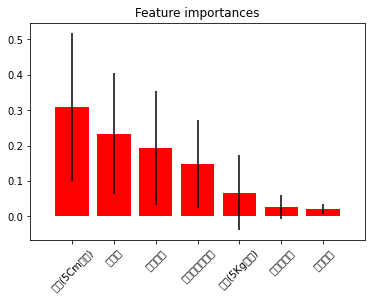

In [52]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, X_train.columns[indices][f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()